<a href="https://colab.research.google.com/github/FarhanTanveer06/470_lms_project/blob/main/Machine_learning_CSE422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data_set = pd.read_csv("/content/Mice_protein_expression_dataset.xls - Hoja1.csv")
feature_names = data_set.columns.tolist()
# print(feature_names)
print(data_set.isnull().sum())
columns_to_impute = feature_names[1:len(feature_names)-4]
print(len(columns_to_impute))
from sklearn.impute import SimpleImputer
import numpy as np

# impute = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
# impute.fit(data_set[columns_to_impute])
# data_set[columns_to_impute] = impute.transform(data_set[columns_to_impute])
impute = SimpleImputer(missing_values= np.nan, strategy = 'mean')
impute.fit(data_set[columns_to_impute])
data_set[columns_to_impute]=impute.transform(data_set[columns_to_impute])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_set[columns_to_impute] = scaler.fit_transform(data_set[columns_to_impute])
# data_set.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64
77


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()
features = ['Genotype', 'Treatment', 'Behavior' ]
data_set['Genotype']= encoding.fit_transform(data_set['Genotype'])
data_set['Treatment']= encoding.fit_transform(data_set['Treatment'])
data_set['Behavior']= encoding.fit_transform(data_set['Behavior'])

In [ ]:
# Assuming 'class' is the target column containing 8 categories

data_set['class'] = encoding.fit_transform(data_set['class'])  # This will encode the class labels to integers

# You can check the encoded classes with
print("Encoded classes:", encoding.classes_)
print(data_set[['class']])

Encoded classes: ['c-CS-m' 'c-CS-s' 'c-SC-m' 'c-SC-s' 't-CS-m' 't-CS-s' 't-SC-m' 't-SC-s']
      class
0         0
1         0
2         0
3         0
4         0
...     ...
1075      7
1076      7
1077      7
1078      7
1079      7

[1080 rows x 1 columns]


In [ ]:
features = data_set.iloc[:, 1:-4]
target = data_set.iloc[:, -1]
print((features))
print(target)

      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.151122  0.212885  0.824638  0.612119  0.630482  0.327006  0.448666   
1     0.155750  0.188226  0.776455  0.601070  0.585247  0.311887  0.429899   
2     0.153459  0.205696  0.793572  0.558911  0.575910  0.306369  0.441381   
3     0.125169  0.157688  0.637326  0.468152  0.480646  0.335530  0.444307   
4     0.122146  0.157838  0.637787  0.426467  0.441977  0.314976  0.433100   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.046197  0.092577  0.365672  0.313684  0.127872  0.312096  0.423753   
1076  0.053509  0.097062  0.357235  0.342243  0.157739  0.395191  0.468154   
1077  0.035163  0.063556  0.311370  0.165795  0.071655  0.330863  0.384915   
1078  0.032018  0.071071  0.337173  0.224787  0.095856  0.306129  0.433086   
1079  0.066342  0.091503  0.370133  0.313976  0.127028  0.394619  0.504969   

      pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, r2_score
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train) #Training the model
predictions = logistic_model.predict(x_test)
print(predictions)# printing predictions
from sklearn.metrics import accuracy_score

logistic_accuracy = accuracy_score(y_test, predictions)
logistic_precision = precision_score(y_test, predictions, average='weighted')
logistic_recall = recall_score(y_test, predictions, average='weighted')
logistic_f1 = f1_score(y_test, predictions, average='weighted')
logistic_cm = confusion_matrix(y_test, predictions)
logistic_auc = roc_auc_score(label_binarize(y_test, classes=range(8)),
                             logistic_model.predict_proba(x_test), multi_class='ovr')
logistic_r2 = r2_score(y_test, predictions)


[1 3 6 4 7 4 7 7 7 5 7 4 4 2 1 3 1 3 0 5 0 0 3 1 3 7 2 1 7 6 4 0 0 2 2 4 6
 0 1 7 1 6 1 7 7 0 0 0 6 3 2 3 1 2 4 5 5 4 3 4 3 7 5 2 5 6 5 3 3 6 3 7 4 1
 0 4 7 7 5 7 2 4 0 0 6 1 6 1 7 0 5 0 3 3 1 7 5 3 0 2 3 6 7 7 1 4 3 0 6 4 4
 7 0 7 4 6 2 0 2 2 5 2 2 3 3 4 0 3 7 6 6 7 2 0 6 6 6 7 5 0 3 2 5 3 6 0 0 7
 0 0 5 2 5 7 1 1 1 2 7 4 5 6 3 0 0 3 1 0 2 4 1 7 7 3 2 2 3 1 3 2 0 2 0 6 1
 1 3 1 3 5 6 2 1 2 3 2 7 7 5 5 2 7 1 1 3 6 6 4 7 0 3 5 5 6 1 2 7 4 4 5 4 1
 5 1 1 6 2 1 1 7 1 0 4 0 2 0 7 0 0 7 0 4 3 6 2 7 1 1 1 2 1 6 1 6 2 3 4 1 1
 5 0 1 0 0 2 6 7 1 0 2 3 2 0 5 5 3 5 6 4 2 4 3 3 6 0 5 7 5 1 4 4 0 2 2 3 1
 6 6 4 0 7 7 0 7 5 4 2 6 1 2 2 1 5 1 6 6 7 2 5 3 0 0 0 6]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

# Naive Bayes model with adjusted smoothing
nb_model = GaussianNB(var_smoothing=1e-6)
nb_model.fit(x_train, y_train)

nb_pred = nb_model.predict(x_test)

nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='weighted', zero_division=0)
nb_recall = recall_score(y_test, nb_pred, average='weighted', zero_division=0)
nb_f1 = f1_score(y_test, nb_pred, average='weighted', zero_division=0)
nb_cm = confusion_matrix(y_test, nb_pred)
nb_auc = roc_auc_score(label_binarize(y_test, classes=range(8)), nb_model.predict_proba(x_test), multi_class='ovr')
nb_r2 = r2_score(y_test, nb_pred)

print("\nNaive Bayes Metrics:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1-Score: {nb_f1:.4f}")
print(f"Confusion Matrix:\n{nb_cm}")
print(f"AUC: {nb_auc:.4f}")


Naive Bayes Metrics:
Accuracy: 0.7747
Precision: 0.7912
Recall: 0.7747
F1-Score: 0.7692
Confusion Matrix:
[[40  1  0  0  5  1  0  0]
 [12 27  0  0  7  3  0  0]
 [ 0  1 39  0  0  0  2  0]
 [ 0  0  1 33  0  0  7  3]
 [ 4  1  0  0 25  1  0  0]
 [ 6  3  0  0  6 15  0  3]
 [ 0  0  4  2  0  0 32  0]
 [ 0  0  0  0  0  0  0 40]]
AUC: 0.9694


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=8)
y_test_encoded = to_categorical(y_test, num_classes=8)
model = Sequential([
    Dense(64, input_dim=x_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')  # 8 output neurons for 8 classes
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train_encoded, epochs=20, batch_size=16, validation_split=0.1, verbose=1)
# Evaluate
loss, neural_accuracy = model.evaluate(x_test, y_test_encoded)
# print("Test accuracy:", neural_accuracy)
nn_predictions_prob = model.predict(x_test)
nn_predictions = np.argmax(nn_predictions_prob, axis=1)

nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions, average='weighted')
nn_recall = recall_score(y_test, nn_predictions, average='weighted')
nn_f1 = f1_score(y_test, nn_predictions, average='weighted')
nn_cm = confusion_matrix(y_test, nn_predictions)
nn_auc = roc_auc_score(label_binarize(y_test, classes=range(8)),
                       nn_predictions_prob, multi_class='ovr')
nn_r2 = r2_score(y_test, nn_predictions)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2232 - loss: 2.0798 - val_accuracy: 0.3553 - val_loss: 1.9788
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4174 - loss: 1.9119 - val_accuracy: 0.3421 - val_loss: 1.8787
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4081 - loss: 1.7488 - val_accuracy: 0.4868 - val_loss: 1.6421
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5216 - loss: 1.5187 - val_accuracy: 0.4474 - val_loss: 1.4375
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5473 - loss: 1.3247 - val_accuracy: 0.5789 - val_loss: 1.2628
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5950 - loss: 1.1830 - val_accuracy: 0.5263 - val_loss: 1.1639
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6164 - loss: 1.0775 - val_accuracy: 0.5658 - val_loss: 1.0372
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6710 - loss: 0.9717 - val_accuracy: 0.6316 - val_loss

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, r2_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

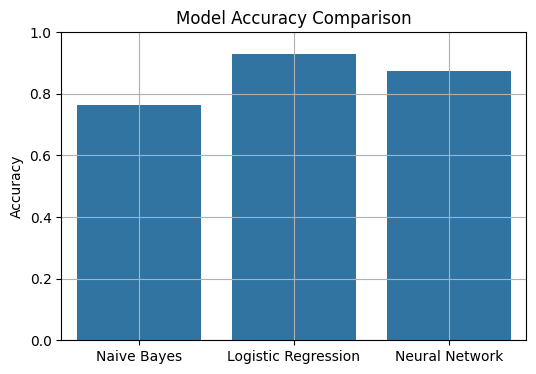

In [ ]:
models = ["Naive Bayes",'Logistic Regression', 'Neural Network']
accuracies = [nb_accuracy,logistic_accuracy, nn_accuracy]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
print("\n=== Precision, Recall, F1-Score ===")
print(f"Logistic Regression - Precision: {logistic_precision:.4f}, Recall: {logistic_recall:.4f}, F1: {logistic_f1:.4f}")
print(f"Neural Network      - Precision: {nn_precision:.4f}, Recall: {nn_recall:.4f}, F1: {nn_f1:.4f}")
print(f"Naive Bayes         - Precision: {nb_precision},  Recall: {nb_recall},  F1: {nb_f1}")



=== Precision, Recall, F1-Score ===
Logistic Regression - Precision: 0.9309, Recall: 0.9290, F1: 0.9292
Neural Network      - Precision: 0.9144, Recall: 0.9136, F1: 0.9134
Naive Bayes         - Precision: 0.7862035533917375,  Recall: 0.7623456790123457,  F1: 0.7567001386414594


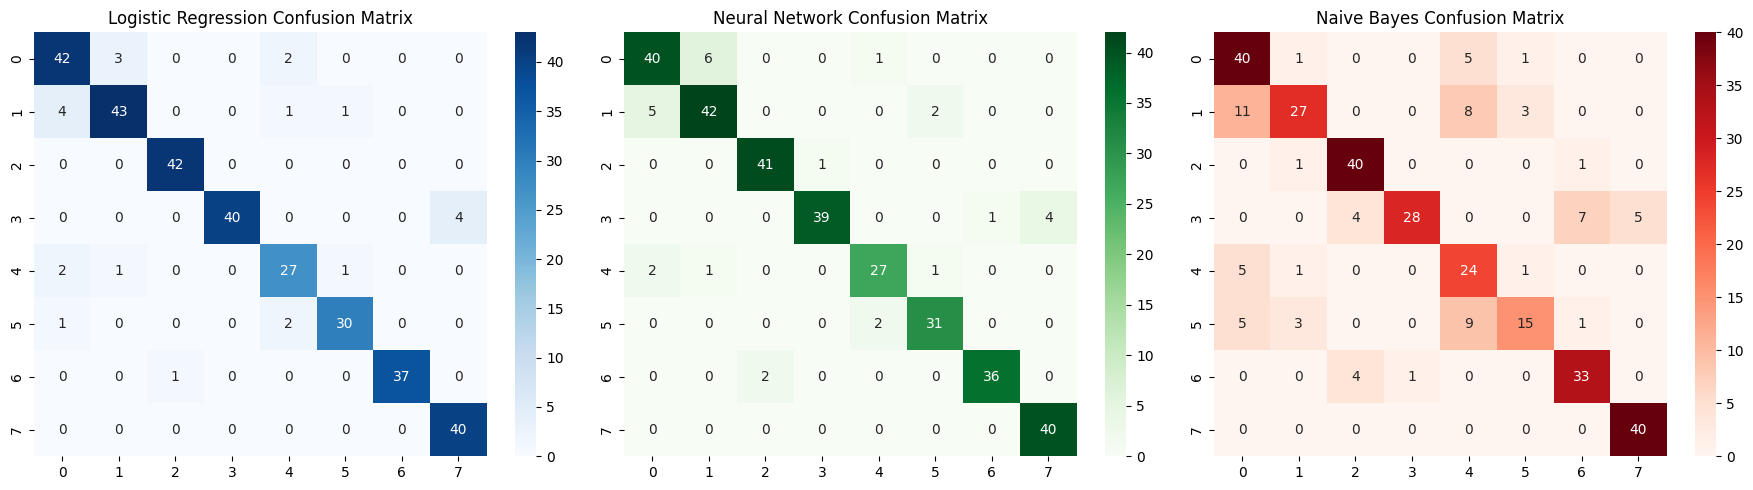

In [ ]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(1, 3, 2)
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Neural Network Confusion Matrix")

plt.subplot(1, 3, 3)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Reds')
plt.title("Naive Bayes Confusion Matrix")

plt.tight_layout()
plt.show()

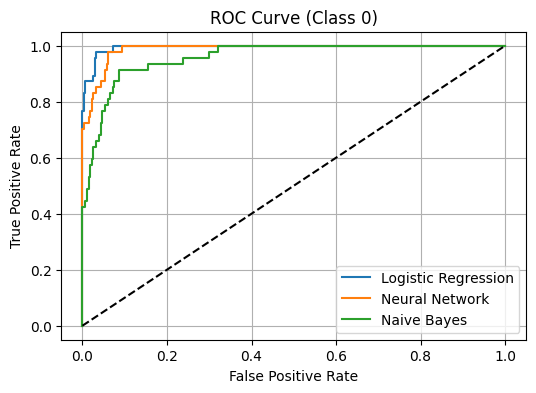

In [ ]:
# ----- ROC Curve for Class 0 -----
fpr_log, tpr_log, _ = roc_curve(label_binarize(y_test, classes=range(8))[:, 0],
                                logistic_model.predict_proba(x_test)[:, 0])
fpr_nn, tpr_nn, _ = roc_curve(label_binarize(y_test, classes=range(8))[:, 0],
                              nn_predictions_prob[:, 0])
fpr_nb, tpr_nb, _ = roc_curve(label_binarize(y_test, classes=range(8))[:, 0],
                              nb_model.predict_proba(x_test)[:, 0])
plt.figure(figsize=(6, 4))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_nn, tpr_nn, label='Neural Network')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (Class 0)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ----- R2 Score and Loss -----
print("\n=== R2 Score ===")
print(f"Logistic Regression R2 Score: {logistic_r2:.4f}")
print(f"Neural Network R2 Score: {nn_r2:.4f}")
print(f'Naive Bayes R2 score : {nb_r2}')

print("\n=== Neural Network Loss ===")
print(f"Loss: {loss:.4f}")


=== R2 Score ===
Logistic Regression R2 Score: 0.8804
Neural Network R2 Score: 0.8827
Naive Bayes R2 score : 0.5805727119595733

=== Neural Network Loss ===
Loss: 0.3754


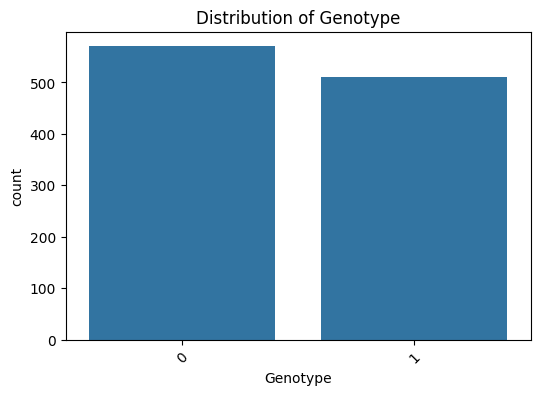

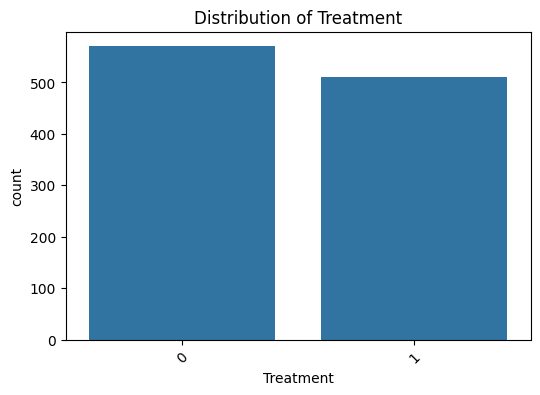

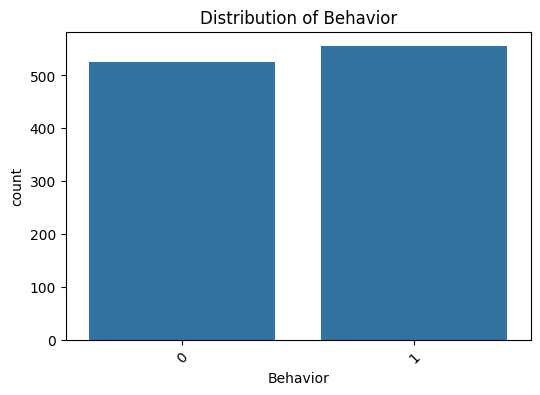

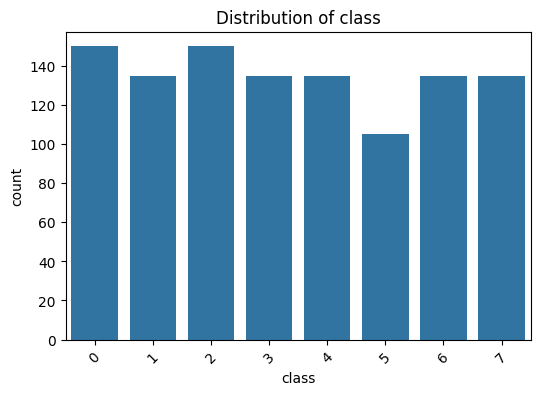

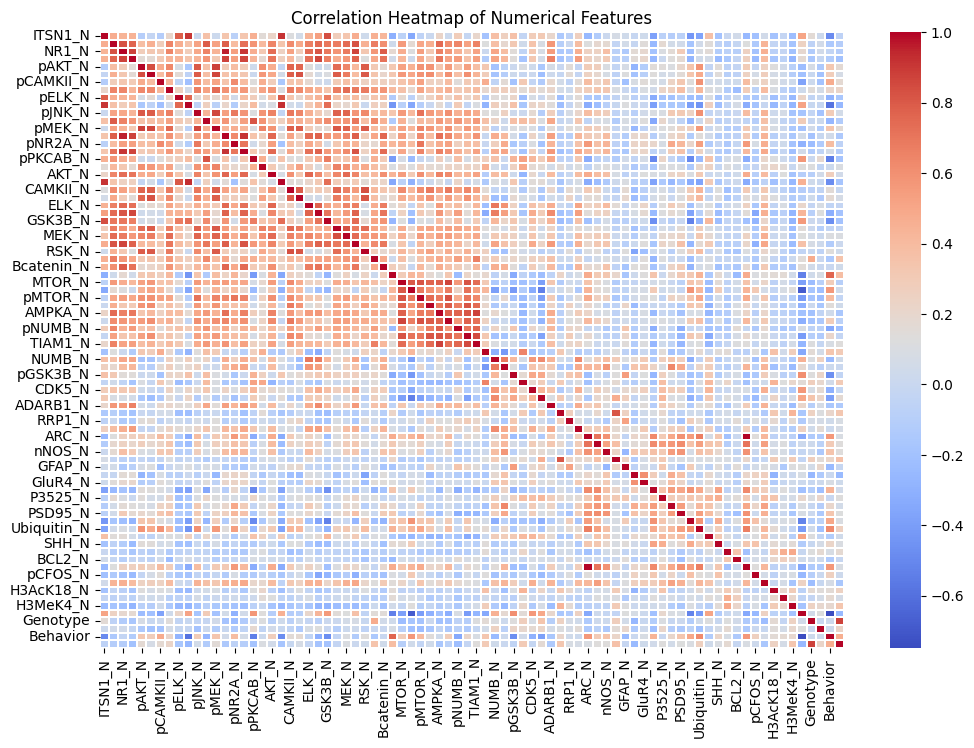

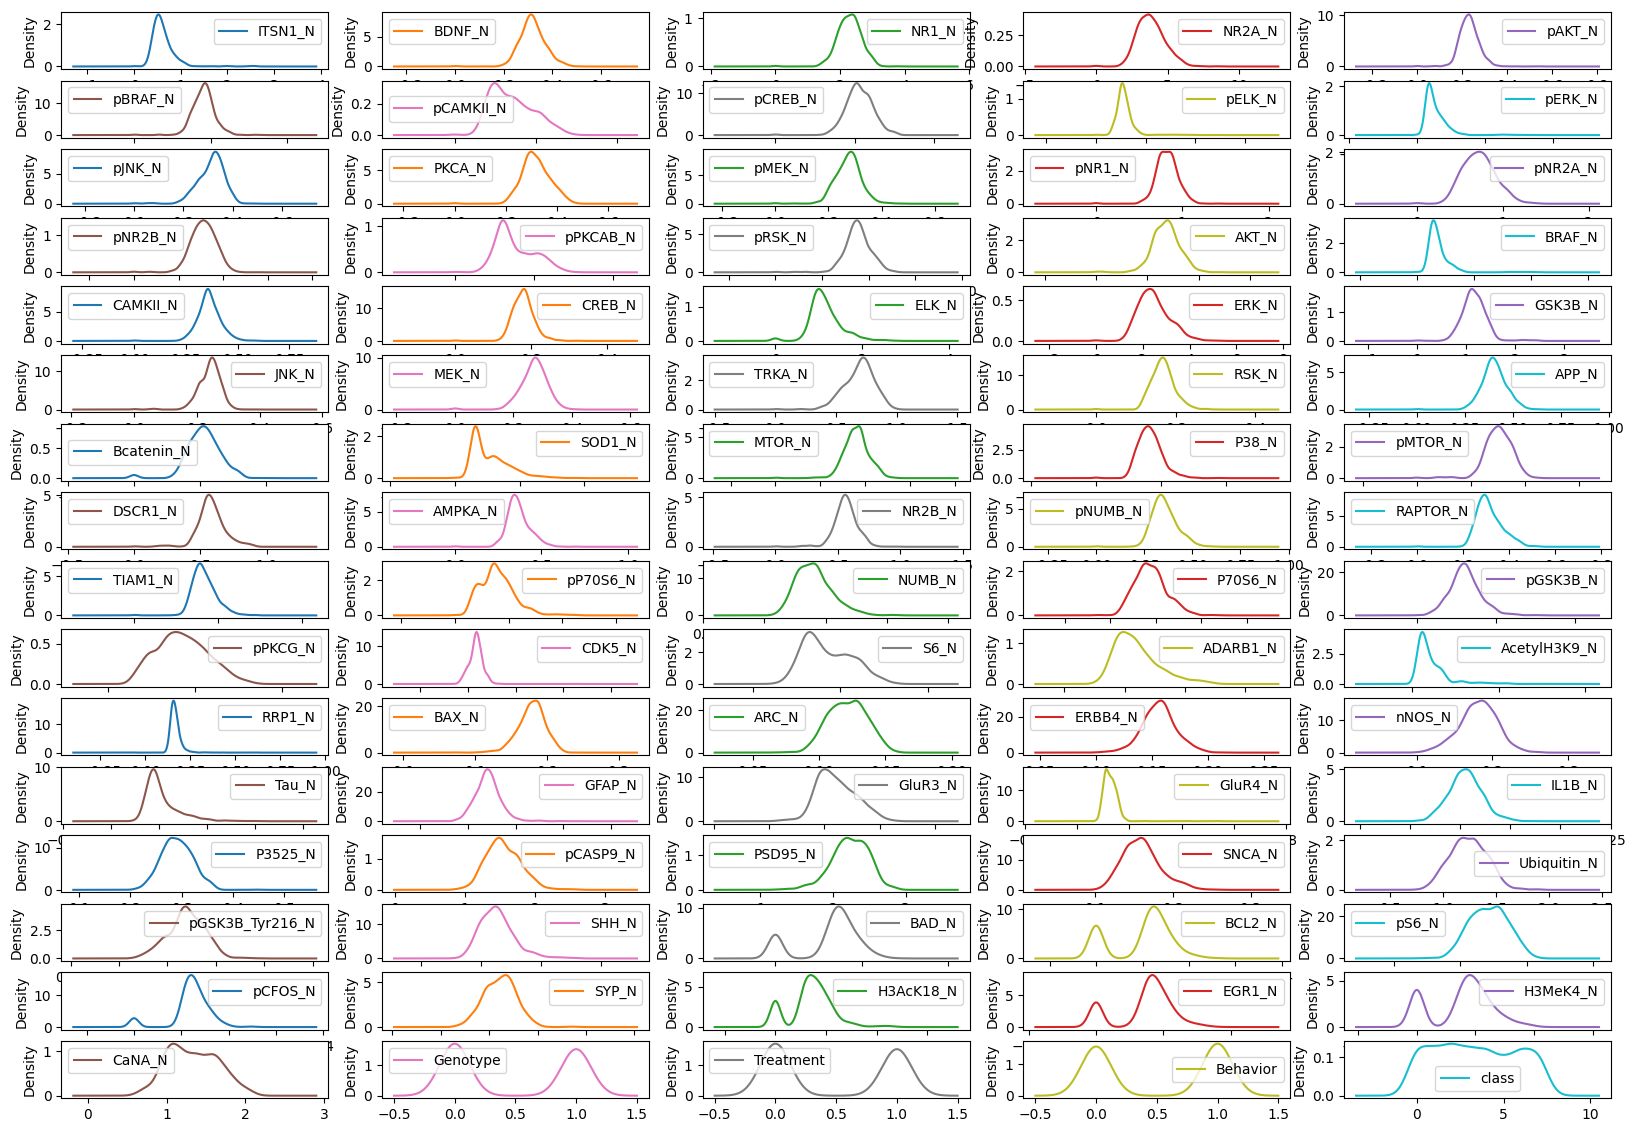

In [ ]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select numerical features (protein expressions) and categorical features
numerical_data = data_set.select_dtypes(include=['float64', 'int64']).iloc[:, 1:]
categorical_data = data_set[['Genotype', 'Treatment', 'Behavior', 'class']]

# 1. Bar Plots for Categorical Features
for col in categorical_data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=categorical_data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# 2. Correlation Matrix and Heatmap for Numerical Features
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 3. Density Plots for Numerical Features
numerical_data.plot(kind='density', figsize=(20, 15), subplots=True, layout=(len(numerical_data.columns)//5+1,5), sharex=False)
plt.show()